# LangGraph Workflow Visualization

This notebook visualizes the AI News LangGraph multi-agent workflow using IPython.display.


In [1]:
# Setup
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd() / "src"))

print("✅ Environment setup complete")


✅ Environment setup complete


In [5]:
# Build the workflow graph
from langgraph.graph import StateGraph, END
from ai_news_langgraph.schemas import WorkflowState

print("🎨 Building LangGraph workflow...")

# Create workflow
workflow = StateGraph(WorkflowState)

# Add nodes
workflow.add_node("fetch_news_for_topic", lambda state: state)
workflow.add_node("summarize_topic_news", lambda state: state)
workflow.add_node("create_executive_summary", lambda state: state)
workflow.add_node("generate_newsletter", lambda state: state)

# Set entry point
workflow.set_entry_point("fetch_news_for_topic")

# Add edges
workflow.add_edge("fetch_news_for_topic", "summarize_topic_news")

# Conditional edge
workflow.add_conditional_edges(
    "summarize_topic_news",
    lambda state: "fetch_news_for_topic" if state.get("current_topic_index", 0) < len(state.get("topics", [])) else "create_executive_summary",
    {
        "fetch_news_for_topic": "fetch_news_for_topic",
        "create_executive_summary": "create_executive_summary"
    }
)

workflow.add_edge("create_executive_summary", "generate_newsletter")
workflow.add_edge("generate_newsletter", END)

# Compile
app = workflow.compile()

print("✅ Graph built successfully!")


🎨 Building LangGraph workflow...
✅ Graph built successfully!


## Visualize the Graph

Display the workflow graph as an image using IPython.display:


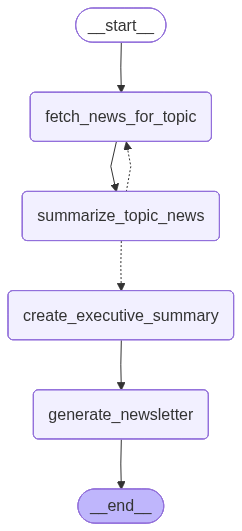

✅ Graph visualization displayed!


In [9]:
# Display the graph using IPython.display
from IPython.display import Image, display

try:
    graph = app.get_graph()
    display(Image(graph.draw_mermaid_png()))
    print("✅ Graph visualization displayed!")
except Exception as e:
    print(f"⚠️ Could not display graph: {e}")
    print("This requires additional dependencies.")
    print("\nView the Mermaid code instead (see next cells)")


In [8]:
# In nodes_v2.py, change:
from .prompts_costar import costar_prompt_registry as prompt_registry

ImportError: attempted relative import with no known parent package

In [7]:
from prompts_costar import get_costar_prompt

prompt = get_costar_prompt("research_agent", "analyze_relevance")
# Use with your LLM

ModuleNotFoundError: No module named 'prompts_costar'